In [2]:
import numpy as np
from sklearn import linear_model,datasets,tree
import matplotlib.pyplot as plt
%matplotlib inline

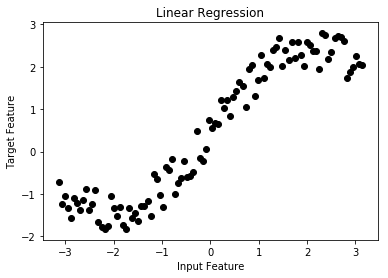

In [5]:
#LOGISTIC REGRESSION
#Creating the sample data for linear regression with the Gaussian Noise
number_of_samples=100
x=np.linspace(-np.pi,np.pi,number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black')
plt.xlabel('Input Feature')
plt.ylabel('Target Feature')
plt.title("Linear Regression")

In [7]:
random_indices = np.random.permutation(number_of_samples)
#Training set
print(random_indices)
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

[23 96 39 42 55 67 18 87 69 74 59 89 72 27 57 10 76 58 80 65 52 11 64 95 34
 54 79  9 17 50 33 13 91 94 70 56 29 82 86 41 48  5 30 53 20 44 92 81  4 28
 84 60 14 16 49 38 36 63 51 98 47 93 43  8  6  0 15  3 97 19 22 75 77 12 40
 78 61 99 90 66 26 32 68  2 46 25 37 88 71 21 45 31 73 62  7 85 83 24 35  1]


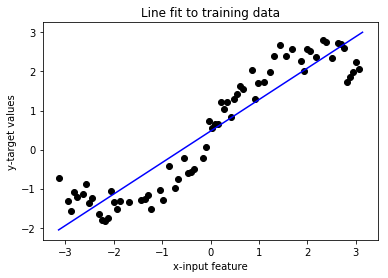

In [8]:
model = linear_model.LinearRegression()
#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)
plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Line fit to training data')
plt.show()

In [10]:
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

print ('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE:  4.80037408456 
Test MSE:  4.60980804914


In [11]:

iris = datasets.load_iris()
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target
#The first 50 samples are class 0 and the next 50 samples are class 1
X = X[:100]
Y = Y[:100]
number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]



In [21]:
#Visualizing the training data
X_class0 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)

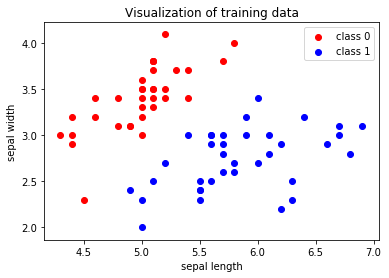

In [27]:
plt.scatter([X_class0[:,0]],[X_class0[:,1]],color='red')
plt.scatter([X_class1[:,0]], [X_class1[:,1]],color='blue')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title('Visualization of training data')
plt.show()

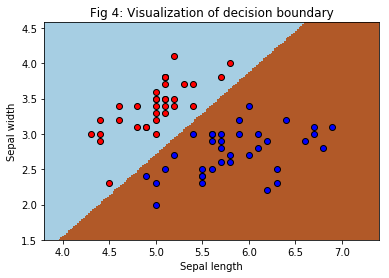

In [28]:
model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
full_X = np.concatenate((X_class0,X_class1),axis=0)
full_Y = np.concatenate((Y_class0,Y_class1),axis=0)
model.fit(full_X,full_Y)

# Display the decision boundary
#(Visualization code taken from: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = full_X[:, 0].min() - .5, full_X[:, 0].max() + .5
y_min, y_max = full_X[:, 1].min() - .5, full_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict for the entire mesh to find the regions for each class in the feature space

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter([X_class0[:, 0]], [X_class0[:, 1]], c='red', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter([X_class1[:, 0]], [X_class1[:, 1]], c='blue', edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

In [32]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print('test misclassification percentage =', test_misclassification_percentage,'%')

validation misclassification percentage = 0.0 %
test misclassification percentage = 0.0 %


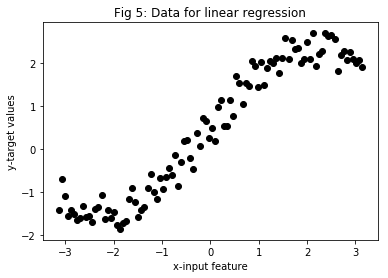

In [34]:
###########DECISION TREE REGRESSION
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for linear regression')
plt.show()

In [35]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

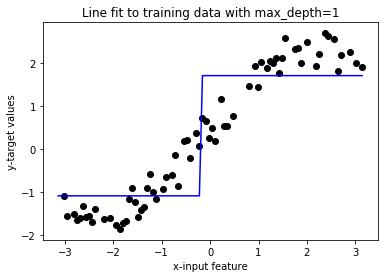

Training MSE:  0.465178467093 
Validation MSE:  0.248727618068 
Test MSE:  0.278828970606


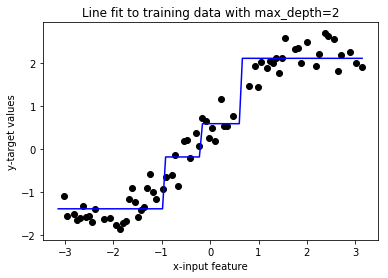

Training MSE:  0.107076062911 
Validation MSE:  0.149465964743 
Test MSE:  0.287861952374


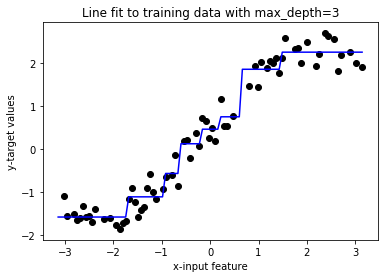

Training MSE:  0.0558094893317 
Validation MSE:  0.1410745928 
Test MSE:  0.217262193882


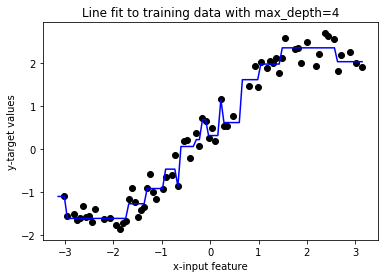

Training MSE:  0.0310308770875 
Validation MSE:  0.0930709045162 
Test MSE:  0.252024123847


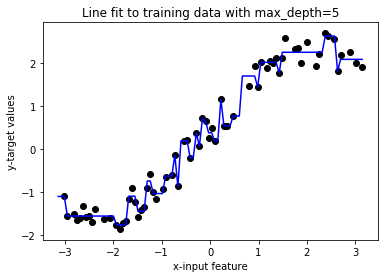

Training MSE:  0.0133244725235 
Validation MSE:  0.0974400202744 
Test MSE:  0.218809547356


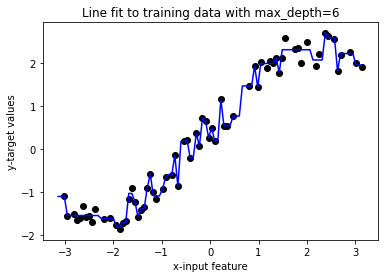

Training MSE:  0.00686274434612 
Validation MSE:  0.10416778379 
Test MSE:  0.233416980278


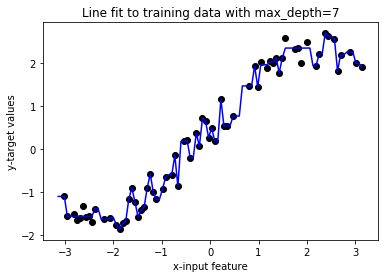

Training MSE:  0.0043123124042 
Validation MSE:  0.108779658937 
Test MSE:  0.24447612938


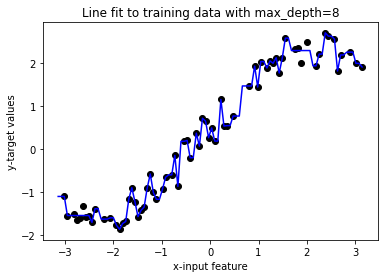

Training MSE:  0.00285511972097 
Validation MSE:  0.121169190151 
Test MSE:  0.245916991205


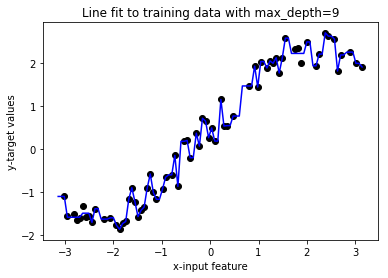

Training MSE:  0.00187929757935 
Validation MSE:  0.124516611433 
Test MSE:  0.252235344775


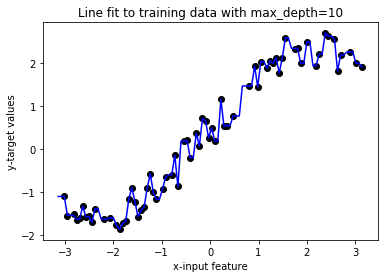

Training MSE:  5.17119841782e-05 
Validation MSE:  0.119585760002 
Test MSE:  0.251615576312


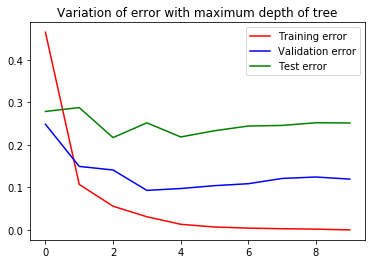

In [36]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print ('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

In [37]:
#DECISION TREE CLASSIFICATION
iris = datasets.load_iris()
X = iris.data #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

In [38]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

InvocationException: GraphViz's executables not found